In [41]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
plt.style.use('default')

In [68]:
#Loading Data
pd.set_option('display.max_rows', 10)
data = pd.read_csv(r'C:\\Users\\cskar\\OneDrive\\Documents\\GitHub\\MachineLearningWithPython\\Market_Basket_Optimisation.csv', header=None)
data.shape

(7501, 20)

In [69]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,antioxydant juice,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [71]:
data[1]

0                 almonds
1               meatballs
2                     NaN
3                 avocado
4                    milk
              ...        
7496           light mayo
7497    frozen vegetables
7498                  NaN
7499            green tea
7500      frozen smoothie
Name: 1, Length: 7501, dtype: object

In [101]:
#Visualizing Data
#Top 10 most popular items in dataset

transaction = []
for i in range(0, data.shape[0]):
    for j in range(0, data.shape[1]):
        transaction.append(data.values[i,j])

transaction = np.array(transaction)

df = pd.DataFrame(transaction, columns=["items"]) 
df["incident_count"] = 1 

indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)

df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()

df_table.head(10).style.background_gradient(cmap='Greens')

,items,incident_count
0,mineral water,1788
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1230
5,green tea,991
6,milk,972
7,ground beef,737
8,frozen vegetables,715
9,pancakes,713


In [73]:
#Top 30 most popular items in dataset
df_table["all"] = "all" 

fig = px.treemap(df_table.head(30), path=['all', "items"], values='incident_count',
                  color=df_table["incident_count"].head(30), hover_data=['items'],
                  color_continuous_scale='Greens'
                  )
fig.show()

In [74]:
#Checking for multiple records in a transaction

transaction = []
for i in range(data.shape[0]):
    transaction.append([str(data.values[i,j]) for j in range(data.shape[1])])
    
transaction = np.array(transaction)

# Create a DataFrame In Order To Check Status of Top20 Items

top20 = df_table["items"].head(20).values
array = []
df_top20_multiple_record_check = pd.DataFrame(columns=top20)

for i in range(0, len(top20)):
    array = []
    for j in range(0,transaction.shape[0]):
        array.append(np.count_nonzero(transaction[j]==top20[i]))
        if len(array) == len(data):
            df_top20_multiple_record_check[top20[i]] = array
        else:
            continue
            
df_top20_multiple_record_check.head(10)

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,burgers,cake,cookies,escalope,low fat yogurt,shrimp,tomatoes,olive oil,frozen smoothie,turkey
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
df_top20_multiple_record_check.describe()

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,burgers,cake,cookies,escalope,low fat yogurt,shrimp,tomatoes,olive oil,frozen smoothie,turkey
count,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000
mean,0.238368,0.179709,0.174110,0.170911,0.163978,0.132116,0.129583,0.098254,0.095321,0.095054,0.087188,0.081056,0.080389,0.079323,0.076523,0.071457,0.068391,0.065858,0.063325,0.062525
std,0.426114,0.383971,0.379229,0.376456,0.370640,0.338639,0.335866,0.297677,0.293677,0.293309,0.282130,0.272939,0.271913,0.270260,0.265851,0.257604,0.252432,0.248050,0.243563,0.242123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
#Choice Analysis / Consumers' First Choices

transaction = []
for i in range(0, data.shape[0]):
    transaction.append(data.values[i,0])

transaction = np.array(transaction)

df_first = pd.DataFrame(transaction, columns=["items"])
df_first["incident_count"] = 1

indexNames = df_first[df_first['items'] == "nan" ].index
df_first.drop(indexNames , inplace=True)

df_table_first = df_first.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table_first["food"] = "food"
df_table_first = df_table_first.truncate(before=-1, after=15) # Fist 15 Choice

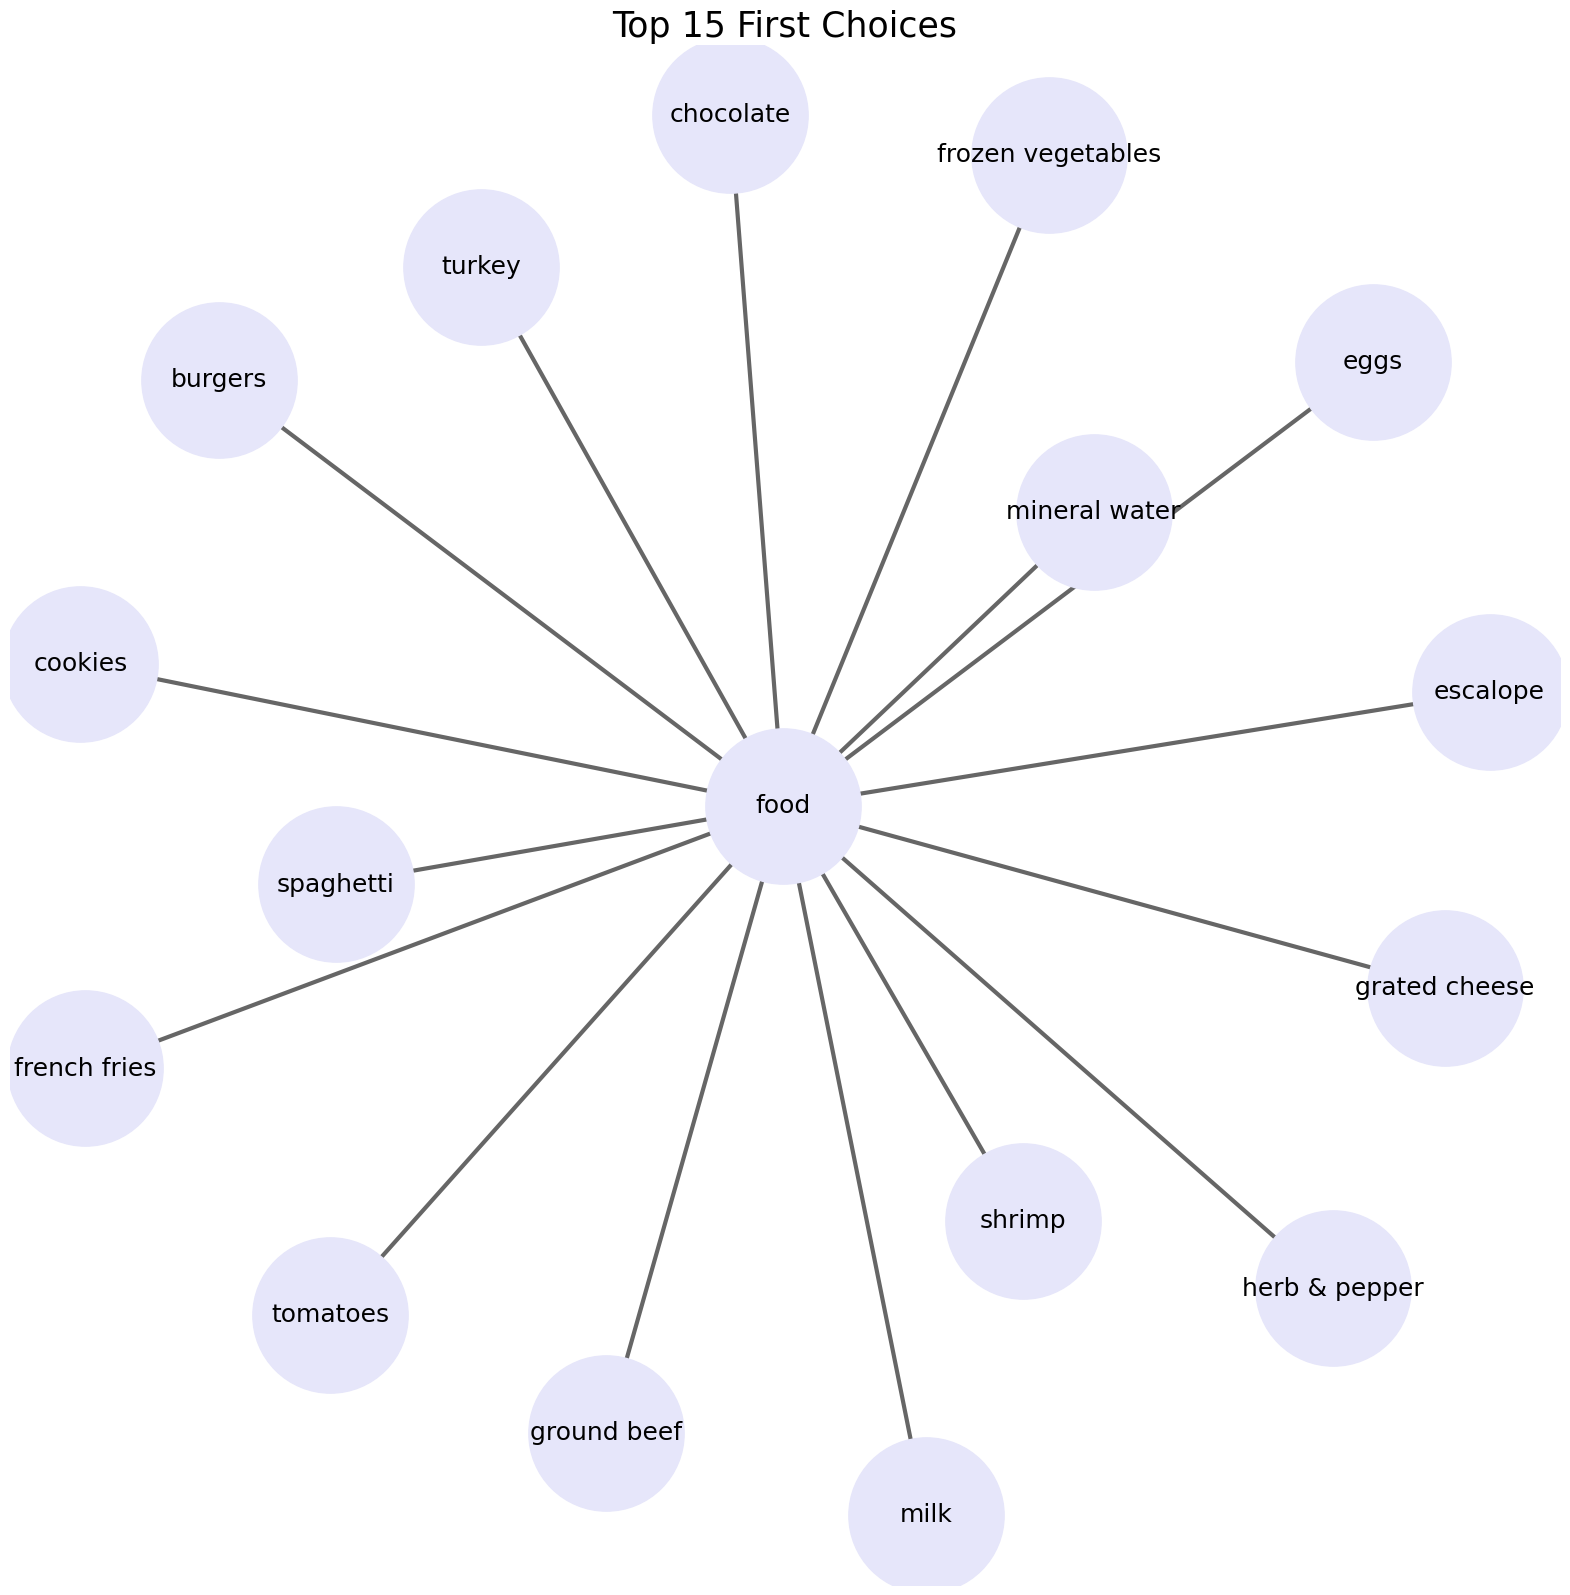

In [78]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
first_choice = nx.from_pandas_edgelist(df_table_first, source = 'food', target = "items", edge_attr = True)
pos = nx.spring_layout(first_choice)
nx.draw_networkx_nodes(first_choice, pos, node_size = 12500, node_color = "lavender")
nx.draw_networkx_edges(first_choice, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(first_choice, pos, font_size = 18, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 25)
plt.show()

In [79]:
transaction = []
for i in range(0, data.shape[0]):
    transaction.append(data.values[i,1])

transaction = np.array(transaction)

df_second = pd.DataFrame(transaction, columns=["items"]) 
df_second["incident_count"] = 1

indexNames = df_second[df_second['items'] == "nan" ].index
df_second.drop(indexNames , inplace=True)

df_table_second = df_second.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table_second["food"] = "food"
df_table_second = df_table_second.truncate(before=-1, after=15) 


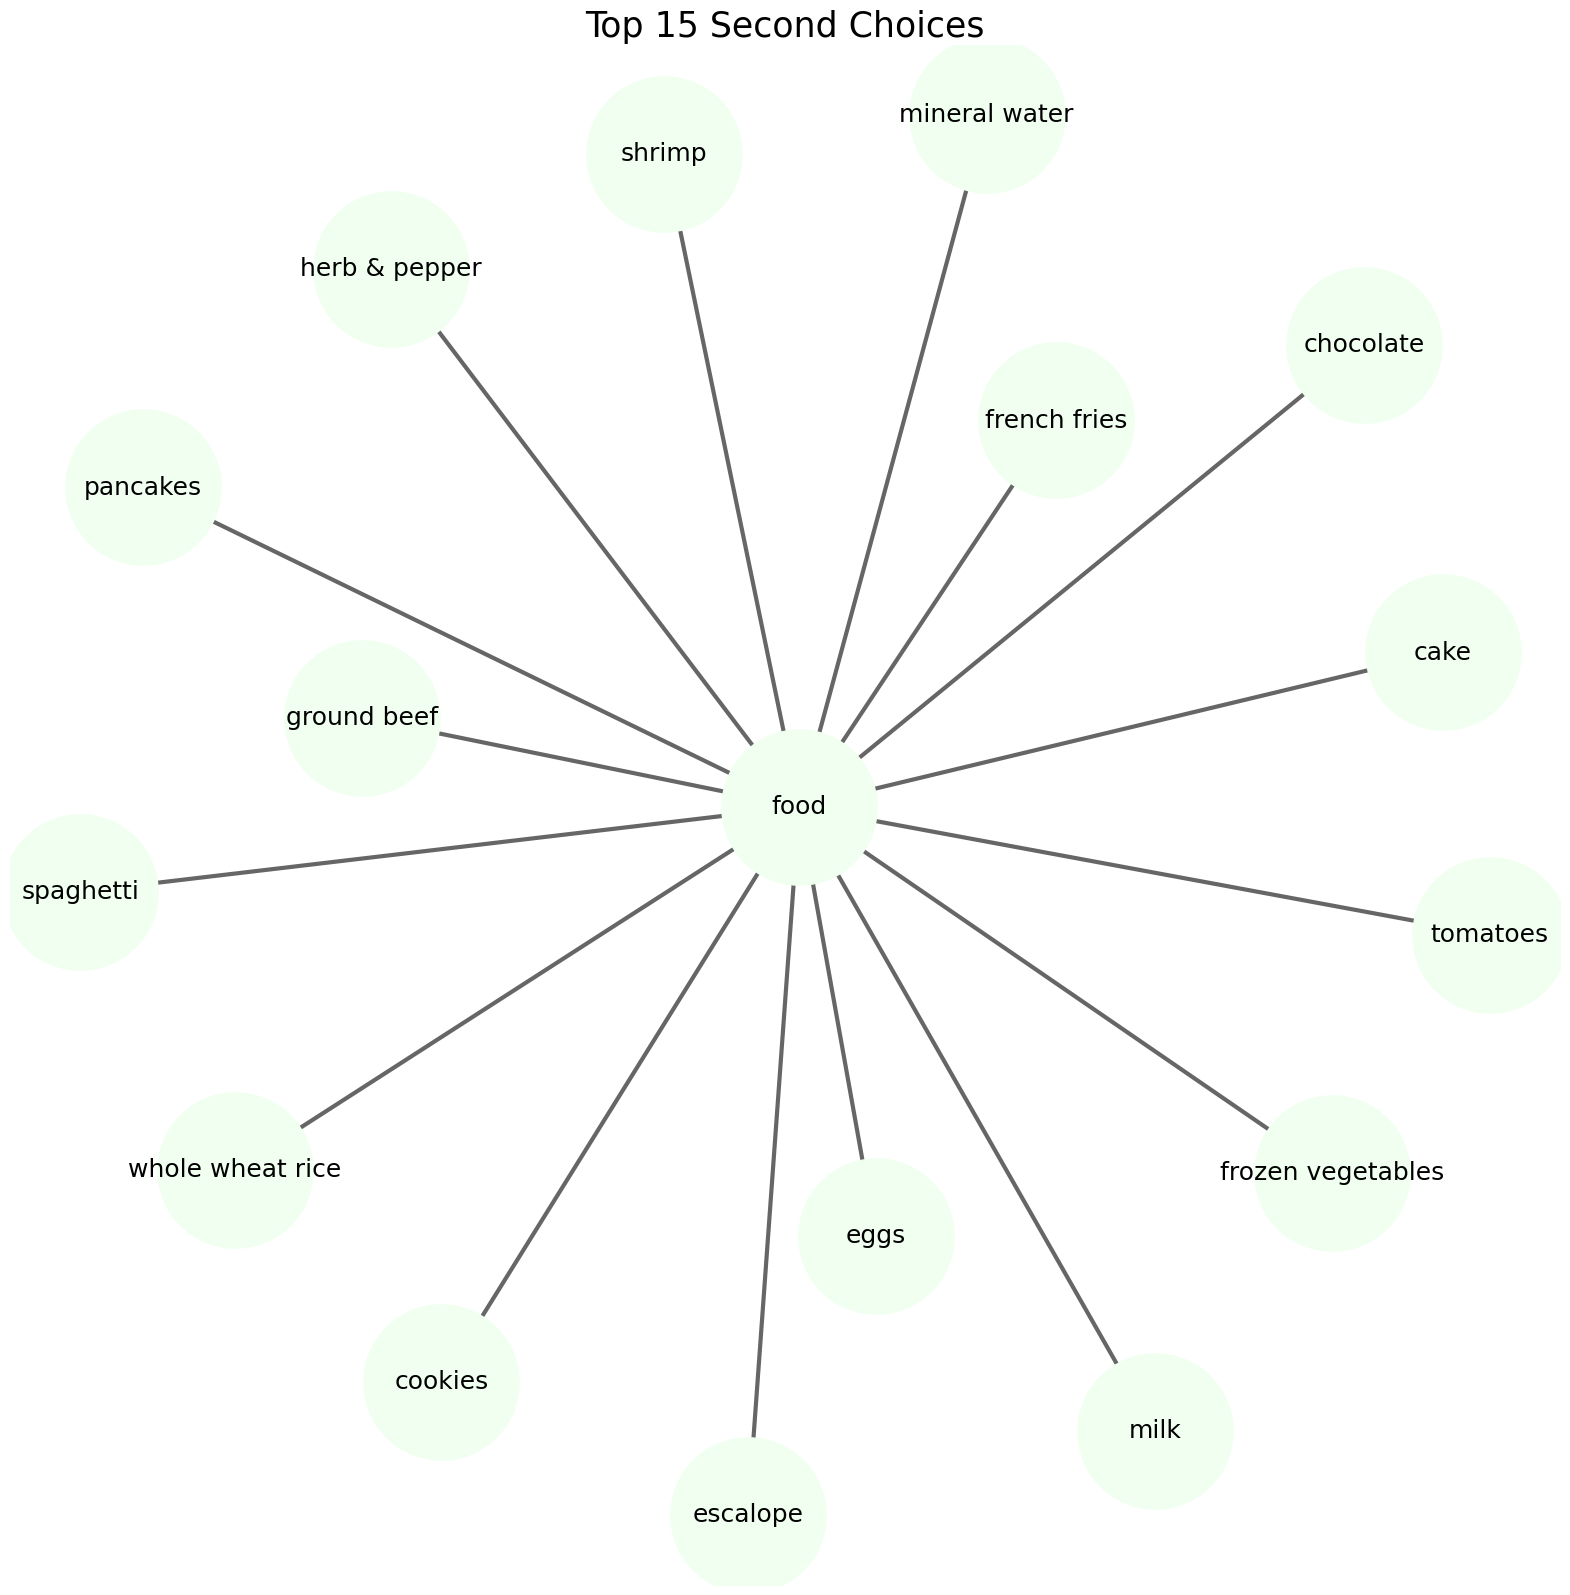

In [80]:
# Choice Analysis / Customers' Second Choices
import warnings
warnings.filterwarnings('ignore')

second_choice = nx.from_pandas_edgelist(df_table_second, source = 'food', target = "items", edge_attr = True)
pos = nx.spring_layout(second_choice)
nx.draw_networkx_nodes(second_choice, pos, node_size = 12500, node_color = "honeydew")
nx.draw_networkx_edges(second_choice, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(second_choice, pos, font_size = 18, font_family = 'sans-serif')
plt.rcParams['figure.figsize'] = (20, 20)
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 25)
plt.show()

In [81]:
#Choice Analysis / Customers' Third Choices
transaction = []
for i in range(0, data.shape[0]):
    transaction.append(data.values[i,2])

transaction = np.array(transaction)

df_third = pd.DataFrame(transaction, columns=["items"]) 
df_third["incident_count"] = 1 

indexNames = df_third[df_third['items'] == "nan" ].index
df_third.drop(indexNames , inplace=True)


df_table_third = df_third.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table_third["food"] = "food"
df_table_third = df_table_third.truncate(before=-1, after=15) 

In [82]:
fig = go.Figure(data=[go.Bar(x=df_table_third["items"], y=df_table_third["incident_count"],
            hovertext=df_table_third["items"], text=df_table_third["incident_count"], textposition="outside")])

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.65)
fig.update_layout(title_text="Customers' Third Choices", template="plotly_dark")
fig.show()

In [84]:
#Data Pre-processing
transaction = []
for i in range(data.shape[0]):
    transaction.append([str(data.values[i,j]) for j in range(data.shape[1])])
    
transaction = np.array(transaction)
transaction

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['chicken', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['escalope', 'green tea', 'nan', ..., 'nan', 'nan', 'nan'],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., 'nan', 'nan',
        'nan']], dtype='<U20')

In [85]:
te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)
dataset

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [86]:
dataset.shape

(7501, 121)

In [87]:
#Top 50 items, Selection & Extraction
first50 = df_table["items"].head(50).values 
dataset = dataset.loc[:,first50]
dataset

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,...,ham,energy bar,energy drink,pepper,vegetables mix,cereals,muffins,oil,french wine,fresh tuna
0,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,True,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,True,False,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [88]:
dataset.columns

Index(['mineral water', 'eggs', 'spaghetti', 'french fries', 'chocolate',
       'green tea', 'milk', 'ground beef', 'frozen vegetables', 'pancakes',
       'burgers', 'cake', 'cookies', 'escalope', 'low fat yogurt', 'shrimp',
       'tomatoes', 'olive oil', 'frozen smoothie', 'turkey', 'chicken',
       'whole wheat rice', 'grated cheese', 'cooking oil', 'soup',
       'herb & pepper', 'honey', 'champagne', 'fresh bread', 'salmon',
       'brownies', 'avocado', 'hot dogs', 'cottage cheese', 'tomato juice',
       'butter', 'whole wheat pasta', 'red wine', 'yogurt cake', 'light mayo',
       'ham', 'energy bar', 'energy drink', 'pepper', 'vegetables mix',
       'cereals', 'muffins', 'oil', 'french wine', 'fresh tuna'],
      dtype='object')

In [89]:
def encode_units(x):
    if x == False:
        return 0 
    if x == True:
        return 1
    
dataset = dataset.applymap(encode_units)
dataset.head(10)

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,...,ham,energy bar,energy drink,pepper,vegetables mix,cereals,muffins,oil,french wine,fresh tuna
0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
# Apriori Algorithm Implementation
frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.179709,(eggs),1
2,0.174110,(spaghetti),1
3,0.170911,(french fries),1
4,0.163845,(chocolate),1
...,...,...,...
227,0.010932,"(mineral water, chocolate, ground beef)",3
228,0.011065,"(mineral water, ground beef, milk)",3
229,0.011065,"(mineral water, frozen vegetables, milk)",3
230,0.010532,"(spaghetti, chocolate, eggs)",3


In [91]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ]

,support,itemsets,length
50,0.050927,"(mineral water, eggs)",2
51,0.059725,"(spaghetti, mineral water)",2
53,0.052660,"(mineral water, chocolate)",2


In [92]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) ].head()

,support,itemsets,length
215,0.014265,"(spaghetti, mineral water, eggs)",3
216,0.013465,"(mineral water, chocolate, eggs)",3
217,0.013065,"(mineral water, eggs, milk)",3
218,0.010132,"(mineral water, ground beef, eggs)",3
219,0.010132,"(spaghetti, french fries, mineral water)",3


In [93]:
# Metric - "lift" with threshold 1.2
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
218,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,1,1
219,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,1,1
288,"(spaghetti, mineral water)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445,2,1
293,(ground beef),"(spaghetti, mineral water)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,1,2
311,(olive oil),"(spaghetti, mineral water)",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898,1,2
...,...,...,...,...,...,...,...,...,...,...,...
60,(low fat yogurt),(eggs),0.076523,0.179709,0.016798,0.219512,1.221484,0.003046,1.050997,1,1
164,(shrimp),(green tea),0.071457,0.132116,0.011465,0.160448,1.214449,0.002025,1.033747,1,1
165,(green tea),(shrimp),0.132116,0.071457,0.011465,0.086781,1.214449,0.002025,1.016780,1,1
122,(french fries),(escalope),0.170911,0.079323,0.016398,0.095944,1.209537,0.002841,1.018385,1,1


In [94]:
rules.sort_values("confidence",ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
268,"(ground beef, eggs)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,2,1
326,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,2,1
320,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,2,1
332,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136,2,1
35,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,1,1
...,...,...,...,...,...,...,...,...,...,...,...
321,(mineral water),"(chocolate, ground beef)",0.238368,0.023064,0.010932,0.045861,1.988472,0.005434,1.023893,1,2
310,(mineral water),"(spaghetti, olive oil)",0.238368,0.022930,0.010265,0.043065,1.878079,0.004799,1.021041,1,2
49,(mineral water),(cereals),0.238368,0.025730,0.010265,0.043065,1.673729,0.004132,1.018115,1,1
269,(mineral water),"(ground beef, eggs)",0.238368,0.019997,0.010132,0.042506,2.125563,0.005365,1.023507,1,2


In [96]:
rules[~rules["consequents"].str.contains("mineral water", regex=False) & 
      ~rules["antecedents"].str.contains("mineral water", regex=False)].sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
75,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,1,1
111,(red wine),(spaghetti),0.028130,0.174110,0.010265,0.364929,2.095966,0.005368,1.300468,1,1
89,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,1,1
344,"(chocolate, milk)",(spaghetti),0.032129,0.174110,0.010932,0.340249,1.954217,0.005338,1.251821,2,1
56,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,1,1
105,(herb & pepper),(spaghetti),0.049460,0.174110,0.016264,0.328841,1.888695,0.007653,1.230543,1,1
218,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,1,1
338,"(chocolate, eggs)",(spaghetti),0.033196,0.174110,0.010532,0.317269,1.822232,0.004752,1.209686,2,1
109,(salmon),(spaghetti),0.042528,0.174110,0.013465,0.316614,1.818472,0.006060,1.208527,1,1
99,(grated cheese),(spaghetti),0.052393,0.174110,0.016531,0.315522,1.812196,0.007409,1.206597,1,1


In [98]:
rules[rules["antecedents"].str.contains("ground beef", regex=False) & rules["antecedents_length"] == 1].sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
7,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,1,1
75,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,1,1
129,(ground beef),(chocolate),0.098254,0.163845,0.023064,0.234735,1.432669,0.006965,1.092635,1,1
174,(ground beef),(milk),0.098254,0.129583,0.021997,0.223881,1.727704,0.009265,1.121499,1,1
293,(ground beef),"(spaghetti, mineral water)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,1,2
205,(ground beef),(frozen vegetables),0.098254,0.095321,0.016931,0.172320,1.807796,0.007565,1.093031,1,1
219,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,1,1
207,(ground beef),(pancakes),0.098254,0.095054,0.014531,0.147897,1.555925,0.005192,1.062015,1,1
214,(ground beef),(olive oil),0.098254,0.065858,0.014131,0.143826,2.183889,0.007661,1.091066,1,1
209,(ground beef),(burgers),0.098254,0.087188,0.011998,0.122117,1.400607,0.003432,1.039787,1,1
